In [1]:
# !git push 

In [2]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
!pip install xmltodict

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
lobster_images = os.listdir('tangier_lobster_images_for_landmarks/')
import xmltodict, json
import imgaug as ia
from imgaug import augmenters as iaa
import math

In [4]:
# def load(path):
#     """takes as input the path to a .pts and returns a list of 
#     tuples of floats containing the points in in the form:
#     [(x_0, y_0, z_0),
#      (x_1, y_1, z_1),
#     ...
#      (x_n, y_n, z_n)]"""
#     with codecs.open(path, 'r', encoding='utf-8') as f:
#         rows = [rows.strip() for rows in f]
    
#     """Use the curly braces to find the start and end of the point data""" 
#     head = rows.index('{') + 1
#     tail = rows.index('}')

#     """Select the point data split into coordinates"""
#     raw_points = rows[head:tail]
#     coords_set = [point.split() for point in raw_points]

#     """Convert entries from lists of strings to tuples of floats"""
#     points = [tuple([float(point) for point in coords]) for coords in coords_set]
#     return points

In [5]:
def process_image_keypoints(img,bbox_coords):
    [(xmin, ymin), (xmax, ymax)] = bbox_coords
    
    img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
    desired_size = 448

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im

In [6]:
# for key in gender_dict:
#     print(gender_dict[key])

In [7]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
image_sizes = []
image_names = []
for file in os.listdir("tangier_lobster_images_for_landmarks_pts/"):
    #try:
        if file.endswith(".pts"):
                image_name = file.split("_imglab.pts")[0]
                lobster_number = image_name.split("_")[0]
                path = 'tangier_lobster_images_for_landmarks/'+image_name
                bgr_img = cv2.imread(path)
                print(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                path = 'tangier_lobster_images_for_landmarks_pts/'+file
                print('tangier_lobster_for_landmarks_bboxes/'+file)
                with open('tangier_lobster_for_landmarks_bboxes/'+image_name.split(".")[0]+'.xml','r') as f:
                   text = f.read()
                   d = xmltodict.parse(text)
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                #print(obj)
                bbox = obj['bndbox']                
                bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]
                #bbox_coords = [[cx - (w/2.0),cy - (h/2.0)],[cx + (w/2.0),cy + (h/2.0)]]
                
                img = process_image_keypoints(img,bbox_coords)

                images.append(img)
                labels.append(lobster_number)
                image_names.append(file)
                #labels.append(obj['name'])
                #bb_sizes.append((w,h))
                #bboxes_rot.append([w,h,cx,cy,angle])
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
    #except Exception as ex:
       #print(ex)
       #count_wrong += 1

tangier_lobster_images_for_landmarks/77_1.jpg
tangier_lobster_for_landmarks_bboxes/77_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/42_22.JPG
tangier_lobster_for_landmarks_bboxes/42_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/61_11.JPG
tangier_lobster_for_landmarks_bboxes/61_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/80_22.JPG
tangier_lobster_for_landmarks_bboxes/80_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/69_22.JPG
tangier_lobster_for_landmarks_bboxes/69_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/12_1.JPG
tangier_lobster_for_landmarks_bboxes/12_1.JPG_imglab.pts
tangier_lobster_images_for_landmarks/93_2.jpg
tangier_lobster_for_landmarks_bboxes/93_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/68_22.JPG
tangier_lobster_for_landmarks_bboxes/68_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/114_1.jpg
tangier_lobster_for_landmarks_bboxes/114_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/53_22.JPG
tangier_lobste

tangier_lobster_images_for_landmarks/17_22.JPG
tangier_lobster_for_landmarks_bboxes/17_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/87_22.JPG
tangier_lobster_for_landmarks_bboxes/87_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/4_11.JPG
tangier_lobster_for_landmarks_bboxes/4_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/44_22.JPG
tangier_lobster_for_landmarks_bboxes/44_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/33_33.JPG
tangier_lobster_for_landmarks_bboxes/33_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/110_1.jpg
tangier_lobster_for_landmarks_bboxes/110_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/1_22.JPG
tangier_lobster_for_landmarks_bboxes/1_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/19_33.JPG
tangier_lobster_for_landmarks_bboxes/19_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/68_11.JPG
tangier_lobster_for_landmarks_bboxes/68_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/54_22.JPG
tangier_lobs

tangier_lobster_images_for_landmarks/85_1.jpg
tangier_lobster_for_landmarks_bboxes/85_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/72_1.jpg
tangier_lobster_for_landmarks_bboxes/72_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/61_1.jpg
tangier_lobster_for_landmarks_bboxes/61_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/23_11.JPG
tangier_lobster_for_landmarks_bboxes/23_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/79_22.JPG
tangier_lobster_for_landmarks_bboxes/79_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/110_11.JPG
tangier_lobster_for_landmarks_bboxes/110_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/17_55.JPG
tangier_lobster_for_landmarks_bboxes/17_55.JPG_imglab.pts
tangier_lobster_images_for_landmarks/67_11.JPG
tangier_lobster_for_landmarks_bboxes/67_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/56_11.JPG
tangier_lobster_for_landmarks_bboxes/56_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/60_2.jpg
tangier_lobst

tangier_lobster_images_for_landmarks/15_1.JPG
tangier_lobster_for_landmarks_bboxes/15_1.JPG_imglab.pts
tangier_lobster_images_for_landmarks/14_2.JPG
tangier_lobster_for_landmarks_bboxes/14_2.JPG_imglab.pts
tangier_lobster_images_for_landmarks/30_22.JPG
tangier_lobster_for_landmarks_bboxes/30_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/63_22.JPG
tangier_lobster_for_landmarks_bboxes/63_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/67_22.JPG
tangier_lobster_for_landmarks_bboxes/67_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/16_44.JPG
tangier_lobster_for_landmarks_bboxes/16_44.JPG_imglab.pts
tangier_lobster_images_for_landmarks/82_22.JPG
tangier_lobster_for_landmarks_bboxes/82_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/114_22.JPG
tangier_lobster_for_landmarks_bboxes/114_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/109_11.JPG
tangier_lobster_for_landmarks_bboxes/109_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/78_33.JPG
tangier_

tangier_lobster_images_for_landmarks/12_11.JPG
tangier_lobster_for_landmarks_bboxes/12_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/32_44.JPG
tangier_lobster_for_landmarks_bboxes/32_44.JPG_imglab.pts
tangier_lobster_images_for_landmarks/76_33.JPG
tangier_lobster_for_landmarks_bboxes/76_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/104_11.JPG
tangier_lobster_for_landmarks_bboxes/104_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/113_2.jpg
tangier_lobster_for_landmarks_bboxes/113_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/71_33.JPG
tangier_lobster_for_landmarks_bboxes/71_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/45_11.JPG
tangier_lobster_for_landmarks_bboxes/45_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/95_2.jpg
tangier_lobster_for_landmarks_bboxes/95_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/59_11.JPG
tangier_lobster_for_landmarks_bboxes/59_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/99_33.JPG
tangier_

tangier_lobster_images_for_landmarks/31_44.JPG
tangier_lobster_for_landmarks_bboxes/31_44.JPG_imglab.pts
tangier_lobster_images_for_landmarks/70_2.jpg
tangier_lobster_for_landmarks_bboxes/70_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/41_33.JPG
tangier_lobster_for_landmarks_bboxes/41_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/112_1.jpg
tangier_lobster_for_landmarks_bboxes/112_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/108_2.jpg
tangier_lobster_for_landmarks_bboxes/108_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/63_2.jpg
tangier_lobster_for_landmarks_bboxes/63_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/95_22.JPG
tangier_lobster_for_landmarks_bboxes/95_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/15_44.JPG
tangier_lobster_for_landmarks_bboxes/15_44.JPG_imglab.pts
tangier_lobster_images_for_landmarks/48_11.JPG
tangier_lobster_for_landmarks_bboxes/48_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/94_33.JPG
tangier_lobs

tangier_lobster_images_for_landmarks/90_1.jpg
tangier_lobster_for_landmarks_bboxes/90_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/60_22.JPG
tangier_lobster_for_landmarks_bboxes/60_22.JPG_imglab.pts
tangier_lobster_images_for_landmarks/90_11.JPG
tangier_lobster_for_landmarks_bboxes/90_11.JPG_imglab.pts
tangier_lobster_images_for_landmarks/100_2.jpg
tangier_lobster_for_landmarks_bboxes/100_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/100_1.jpg
tangier_lobster_for_landmarks_bboxes/100_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/16_33.JPG
tangier_lobster_for_landmarks_bboxes/16_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/101_2.jpg
tangier_lobster_for_landmarks_bboxes/101_2.jpg_imglab.pts
tangier_lobster_images_for_landmarks/93_1.jpg
tangier_lobster_for_landmarks_bboxes/93_1.jpg_imglab.pts
tangier_lobster_images_for_landmarks/7_33.JPG
tangier_lobster_for_landmarks_bboxes/7_33.JPG_imglab.pts
tangier_lobster_images_for_landmarks/5_33.JPG
tangier_lobster

tangier_lobster_images_for_landmarks/23_22.JPG
tangier_lobster_for_landmarks_bboxes/23_22.JPG_imglab.pts


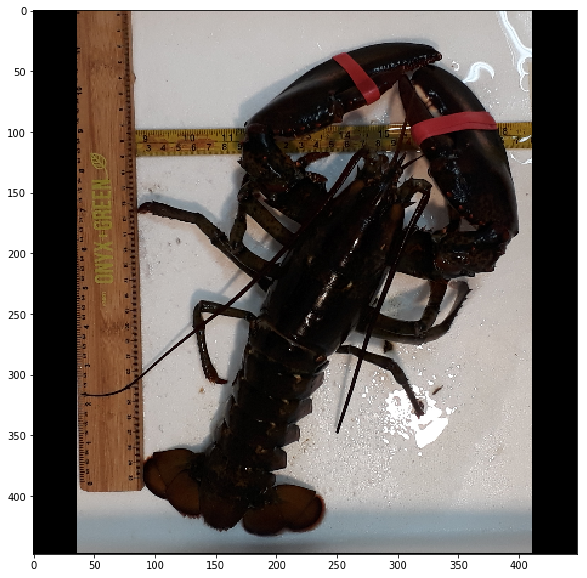

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(images[6])

In [9]:
# count_correct = 0
# images = []
# labels = []
# count_wrong = 0
# for file in os.listdir("tangier_lobster_images_for_landmarks/"):
#     try:
#         if file.endswith(".jpg") or file.endswith(".JPG"):
#                 lobster_number = file.split("_")[0]
#                 print(lobster_number)
#                 path = 'tangier_lobster_images_for_landmarks/'+file
#                 print(path)
#                 bgr_img = cv2.imread(path)
#                 img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
#                 images.append(process_image_keypoints(img))
#                 labels.append(int(lobster_number))
#     except Exception as ex:
#         print(ex)
#         count_wrong += 1

In [10]:
len(labels)

560

In [11]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.01, 0.01), "y": (-0.01, 0.01)}, # translate by -20 to +20 percent (per axis)
            rotate=(-10, 10), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                #iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                #iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [12]:
# landmarks = list(np.array(landmarks)[indexes])
# bboxes = list(np.array(bboxes)[indexes])
# labels =  list(np.array(labels)[indexes])
# images = list(np.array(images)[indexes])
# image_sizes = list(np.array(image_sizes)[indexes])

In [13]:
# import seaborn as sns
# import numpy as np
# from scipy.stats import itemfreq
# itemfreq(labels)

In [14]:
# num_labels = len(np.unique(list(labels)))
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(list(labels))
# le_labels = le.transform(labels)
# one = preprocessing.OneHotEncoder()
# one.fit(list(le_labels.reshape(-1,1)))
# one_labels = one.transform(le_labels.reshape(-1,1))
# numpy.save('classes.npy', le.classes_)

In [15]:
def augment_images(images,labels,times):
    all_images = list(images)
    all_labels = list(labels)
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    return all_images,all_labels

In [1]:
len(images)

NameError: name 'images' is not defined

In [16]:
# list(np.array(labels)[train])

In [17]:
from sklearn.model_selection import StratifiedKFold
StratifiedKFold()

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [18]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=4,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images)[train],np.array(labels)[train],2)
    kfold_data.append([train_images,train_labels,np.array(images)[test],np.array(labels)[test]])

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


1
2
3
4


In [20]:
with open('traceability0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('traceability1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('traceability2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('traceability3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)

In [ ]:
# idx = 408
# tuples = []
# for i in range(11):
#     tuples.append((all_landmarks[idx][i*2],all_landmarks[idx][i*2+1]))
# for i in range(11):
#     img = cv2.circle(all_images[idx],(int(tuples[i][0]),int(tuples[i][1])), 1, (0,0,255), -1)
    
# pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
# pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
# img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
# pil_im = Image.fromarray(img)
# plt.figure(figsize=(15,15))
# plt.imshow(pil_im)

In [ ]:
# plt.figure(figsize=(20,20))
# plt.imshow(kfold_data[0][0][46+373+373])

NameError: name 'all_bboxes' is not defined

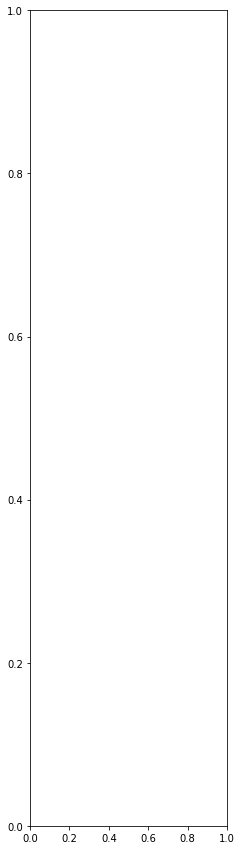

In [17]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 381
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 786
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 1014
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('rotated_bounding_boxes.jpg')
plt.show()

In [11]:
import pickle
import matplotlib.pyplot as plt
with open('traceability0.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)

In [6]:
def convert_to_dict(train_images,train_labels):
    train_dict = {}
    for img,label in zip(list(train_images),list(train_labels)):
        if int(label) in train_dict:
            train_dict[int(label)].append(img)
        else:
            train_dict[int(label)] = [img]
    return train_dict

In [7]:
train_dict = convert_to_dict(train_images,train_labels)
test_dict = convert_to_dict(test_images,test_labels)

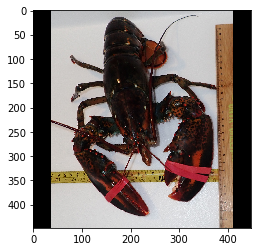

In [47]:
plt.imshow(train_dict[2][1])

In [67]:
# for i in train_dict:
#     print(train_dict[i])

In [65]:
sum([label=='2' for label in labels])

3

In [4]:
import pickle
with open('traceability0.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)

([], <a list of 0 Text yticklabel objects>)

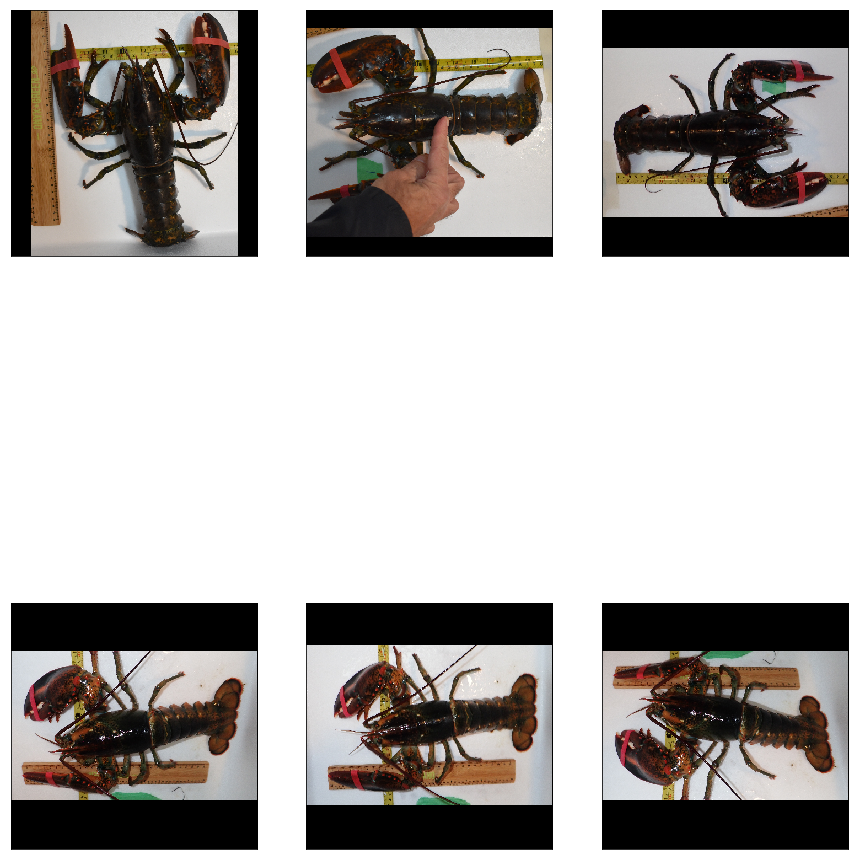

In [28]:
idx= 10
fig, ax = plt.subplots(figsize=(15,20))

idx = 1
plt.subplot(2, 3, 1)
plt.imshow(train_dict[idx][0])
plt.xticks([])
plt.yticks([])
#plt.title('Cod')


plt.subplot(2, 3, 2)
plt.imshow(train_dict[idx][2])
plt.xticks([])
plt.yticks([])
#plt.title('Augmented Cod')

plt.subplot(2, 3, 3)
plt.imshow(train_dict[idx][3])
plt.xticks([])
plt.yticks([])
#plt.title('Augmented Cod')

# plt.subplot(2, 4, 4)
# plt.imshow(test_dict[1][1])
# plt.xticks([])
# plt.yticks([])
# #plt.title('Augmented Cod')

idx = 54

plt.subplot(2, 3, 4)
plt.imshow(train_dict[idx][0])
plt.xticks([])
plt.yticks([])
#plt.title('Cod')


plt.subplot(2, 3, 5)
plt.imshow(train_dict[idx][2])
plt.xticks([])
plt.yticks([])
#plt.title('Augmented Cod')

plt.subplot(2, 3, 6)
plt.imshow(train_dict[idx][3])
plt.xticks([])
plt.yticks([])
#plt.title('Augmented Cod')

# plt.subplot(2, 3, 8)
# plt.imshow(test_dict[15][0])
# plt.xticks([])
# plt.yticks([])
#plt.title('Augmented Cod')

# plt.subplot(5, 3, 4)
# plt.imshow(kfold_data[0][0][0*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Crab')


# plt.subplot(5, 3, 5)
# plt.imshow(kfold_data[0][0][1*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Crab')

# plt.subplot(5, 3, 6)
# plt.imshow(kfold_data[0][0][2*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Crab')

# idx= 24

# plt.subplot(5, 3, 7)
# plt.imshow(kfold_data[0][0][0*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Lobster')


# plt.subplot(5, 3, 8)
# plt.imshow(kfold_data[0][0][1*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Lobster')

# plt.subplot(5, 3, 9)
# plt.imshow(kfold_data[0][0][2*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Lobster')

# idx = 206

# plt.subplot(5, 3, 10)
# plt.imshow(kfold_data[0][0][0*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Halibut')


# plt.subplot(5, 3, 11)
# plt.imshow(kfold_data[0][0][1*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Halibut')

# plt.subplot(5, 3, 12)
# plt.imshow(kfold_data[0][0][2*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Halibut')


# idx = 215

# plt.subplot(5, 3, 13)
# plt.imshow(kfold_data[0][0][0*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Kusk')


# plt.subplot(5, 3, 14)
# plt.imshow(kfold_data[0][0][1*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Kusk')

# plt.subplot(5, 3, 15)
# plt.imshow(kfold_data[0][0][2*temp + idx])
# plt.xticks([])
# plt.yticks([])
# plt.title('Augmented Kusk')


# plt.savefig('image_augmentation.jpg')
# plt.show()
